In [1]:

import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

In [2]:
img= cv2.imread(r"/MascotSayali.jpg")
#img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #we are converting image to BGR because matplotlib displays image BGR format
#if you are using cv2 for displaying image, no need to convert image to BGR

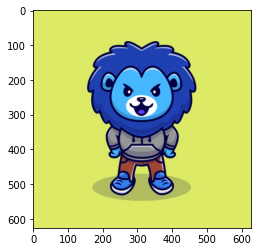

In [3]:
plt.imshow(img)
plt.show()

In [4]:
height, width, dims= img.shape
print(height, width, dims) #print dimensions of original image

626 626 3


In [5]:
#lets convert image to gray scale

In [6]:
gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # use cv2.COLOR_RGB2GRAY if you are using cv2 for displaying image,
#it doesn't matter while converting image to grayscale

In [7]:
print(gray.shape)

(626, 626)


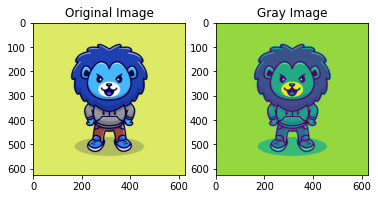

In [8]:
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(gray)
plt.title("Gray Image")
plt.show()

In [9]:

#dims(number of matrices) will be 1 for grayscale image because then it will have only one channel

In [10]:
img= cv2.resize(img,(700,700))
img.shape

(700, 700, 3)

In [11]:
#flipping image means flipping matrix, its that simple
#numpy provides methods like fliplr and flipud for flipping matrix horizontally and vertically

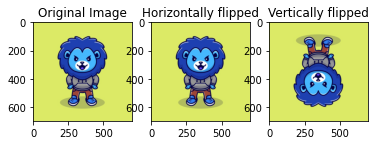

In [12]:
plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(img)

hflipped_image= np.fliplr(img) #fliplr reverse the order of columns of pixels in matrix
plt.subplot(132) 
plt.title("Horizontally flipped")
plt.imshow(hflipped_image)

vflipped_image= np.flipud(img) #flipud reverse the order of rows of pixels in matrix
plt.subplot(133)
plt.title("Vertically flipped")
plt.imshow(vflipped_image)
plt.show()

In [13]:
#lets check the image rotation part
#skimage.transform provides method "rotate()""

In [14]:
r_image = rotate(img, angle=45) # angle value is positive for anticlockwise rotation 
r_image1 = rotate(img, angle=-45) #angle value is negative for clockwise rotation

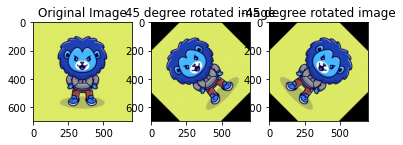

In [15]:
plt.subplot(131)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(r_image)
plt.title("45 degree rotated image")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("-45 degree rotated image")
plt.show()

In [16]:
#using flipping and rotation, we can generate 10 times the data we have
#we also have some other transforming methods like transform which shift the pixel value in image

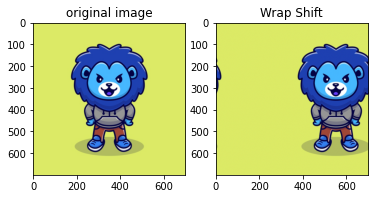

In [17]:
transform = AffineTransform(translation=(-200,0))  # (-200,0) are x and y coordinate, change it see the effect
warp_image = warp(img,transform, mode="wrap") #mode parameter is optional
# mode= {'constant', 'edge', 'symmetric', 'reflect', 'wrap'}
#these are possible values of mode, you can try them and decide which one to use, default value for mode is constant
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Wrap Shift')
plt.imshow(warp_image)

In [18]:
blur_image= cv2.GaussianBlur(img, (11,11),0)

In [19]:
#Lets define functions for each operation
def anticlockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, -angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)




#classifying blur and non-blur images
def warp_shift(image): 
    transform = AffineTransform(translation=(0,40))  
    warp_image = warp(image, transform, mode="wrap")
    return warp_image